### Auto-generate cluster boundaries
Alpha Shape: https://en.wikipedia.org/wiki/Alpha_shape 

Testing Data:  
labeled_velocity_novert_gmm_k2_novector.kml     
labeled_velocity_novert_gmm_k5_novector.kml

In [1]:
import geopandas
from geopandas import GeoSeries
import alphashape
import shapely.geometry

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

### Two classes example

In [3]:
gpd = geopandas.read_file("v2class2d.geojson")

In [4]:
gpd.head()

,Label,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,geometry
0,class1,"<a href=""http://sideshow.jpl.nasa.gov/post/lin...",None,None,None,None,-1,0,-1,None,None,POINT (-117.44489 33.27427)
1,class2,"<a href=""http://sideshow.jpl.nasa.gov/post/lin...",None,None,None,None,-1,0,-1,None,None,POINT (-116.42938 34.59428)
2,class2,"<a href=""http://sideshow.jpl.nasa.gov/post/lin...",None,None,None,None,-1,0,-1,None,None,POINT (-115.15846 37.35796)
3,class1,"<a href=""http://sideshow.jpl.nasa.gov/post/lin...",None,None,None,None,-1,0,-1,None,None,POINT (-118.69480 34.82449)
4,class1,"<a href=""http://sideshow.jpl.nasa.gov/post/lin...",None,None,None,None,-1,0,-1,None,None,POINT (-119.36347 34.01501)


<AxesSubplot:>

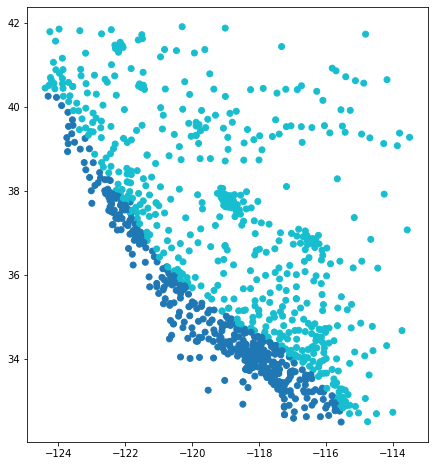

In [5]:
gpd.plot(column="Label")

In [6]:
class_list = gpd.Label.unique()

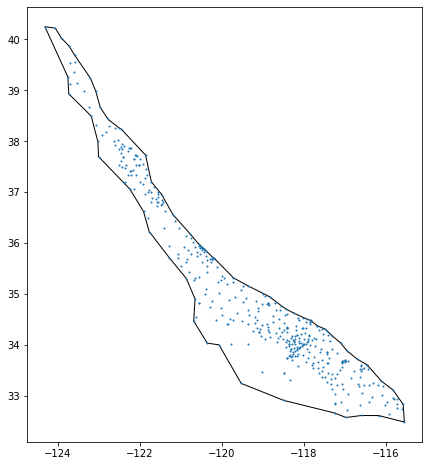

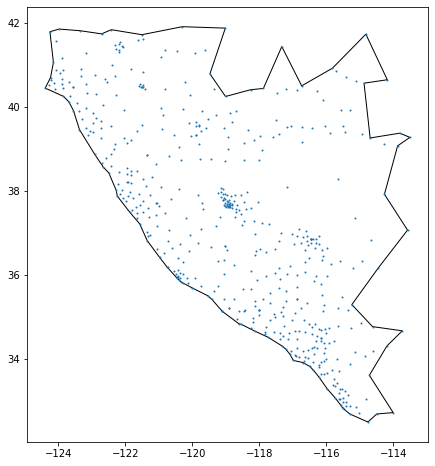

In [7]:
al_list = []
for entry in class_list:
    # select gpd by name
    temgpd = gpd[(gpd['Label'] == entry)]
    ashape = alphashape.alphashape(temgpd)
    al_list.append(ashape)
    base = ashape.plot(facecolor="none",edgecolor="black")
    temgpd.plot(ax=base, markersize=1)

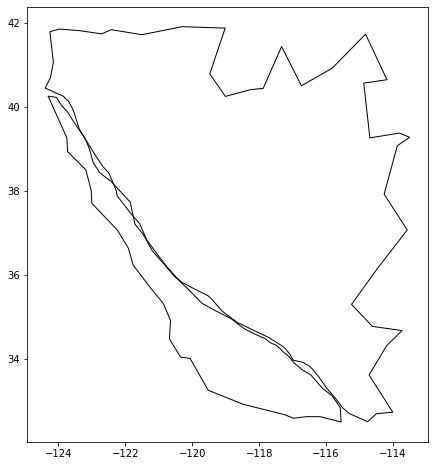

In [8]:
pbase = al_list[0].plot(facecolor="none",edgecolor="black")
for entry in al_list[1:]:
    entry.plot(ax=pbase,facecolor="none",edgecolor="black")

In [9]:
c1 = (al_list[0]['geometry'].buffer(0.2)).intersection(al_list[1]['geometry'].buffer(0.2))

<ipython-input-9-f219ffc49f2a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  c1 = (al_list[0]['geometry'].buffer(0.2)).intersection(al_list[1]['geometry'].buffer(0.2))


<AxesSubplot:>

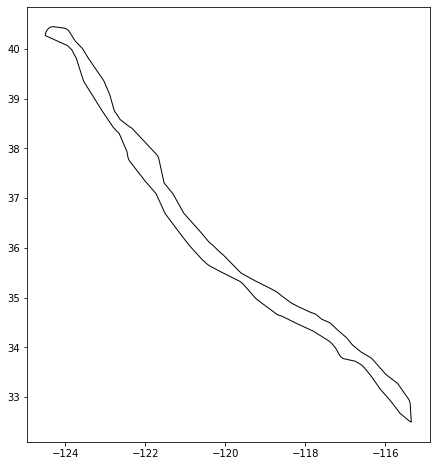

In [10]:
c1.plot(facecolor="none",edgecolor="black")

In [11]:
from centerline.geometry import Centerline

In [12]:
c1.geometry

0    POLYGON ((-115.35105 32.50543, -115.35077 32.4...
dtype: geometry

In [13]:
attributes = {"id": 1, "name": "polygon", "valid": True}
centerline = Centerline(shapely.geometry.Polygon(c1.geometry[0]),interpolation_distance=0.1, **attributes)

<AxesSubplot:>

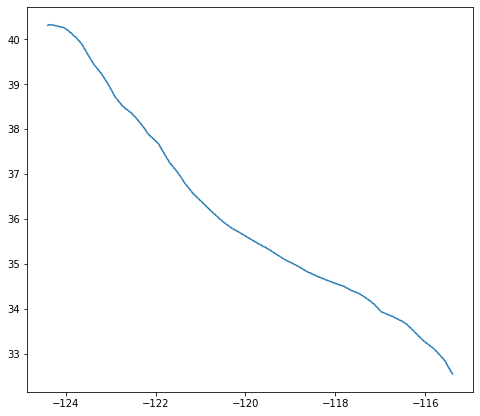

In [14]:
geo=GeoSeries(centerline.geoms)
geo.plot()

<AxesSubplot:>

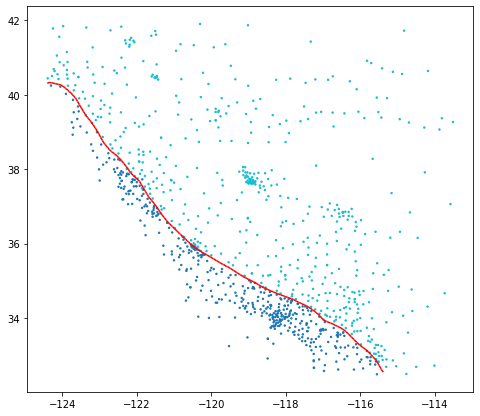

In [15]:
base=gpd.plot(column="Label",markersize=2)
geo.plot(ax=base,edgecolor="red")

### Five classes example

<AxesSubplot:>

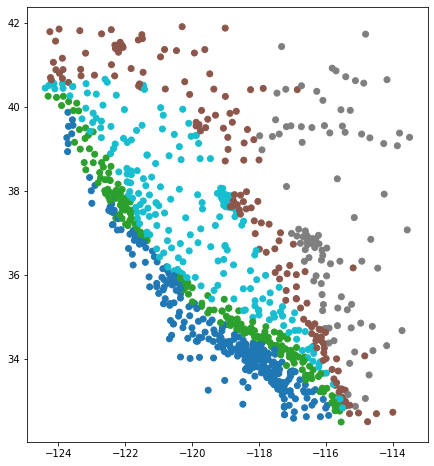

In [16]:
gpd = geopandas.read_file("v5class2d.geojson")
gpd.plot(column="Label")

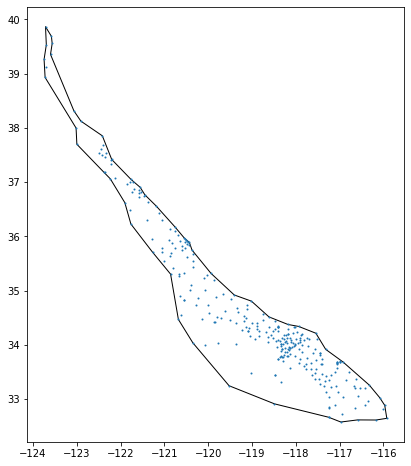

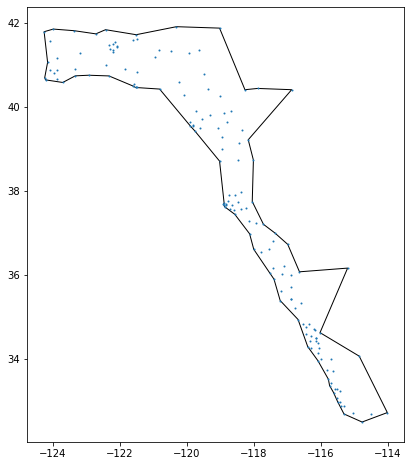

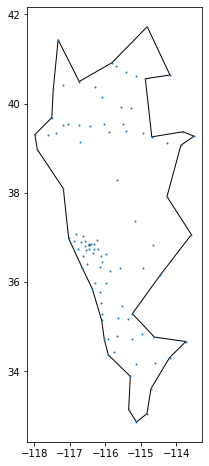

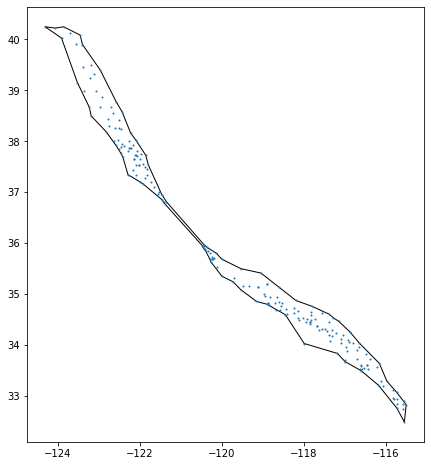

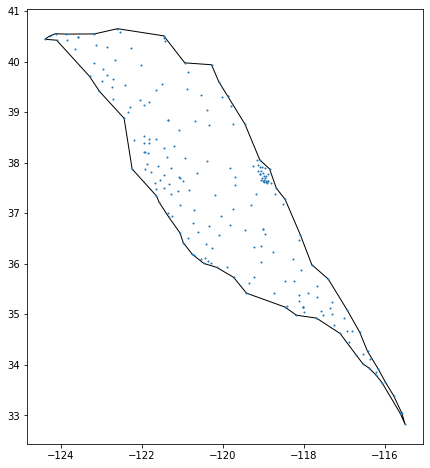

In [17]:
class_list = gpd.Label.unique()
al_list = []
for entry in class_list:
    # select gpd by name
    temgpd = gpd[(gpd['Label'] == entry)]
    ashape = alphashape.alphashape(temgpd)
    al_list.append(ashape)
    base = ashape.plot(facecolor="none",edgecolor="black")
    temgpd.plot(ax=base, markersize=1)

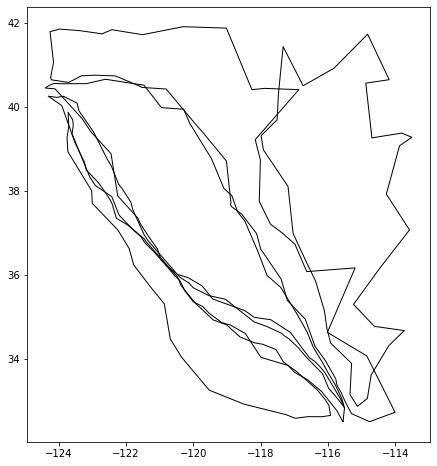

In [18]:
pbase = al_list[0].plot(facecolor="none",edgecolor="black")
for entry in al_list[1:]:
    entry.plot(ax=pbase,facecolor="none",edgecolor="black")

In [19]:
al_buffer_list = [x['geometry'].buffer(0.15) for x in al_list]
    

<ipython-input-19-f5d80b422ef1>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  al_buffer_list = [x['geometry'].buffer(0.15) for x in al_list]


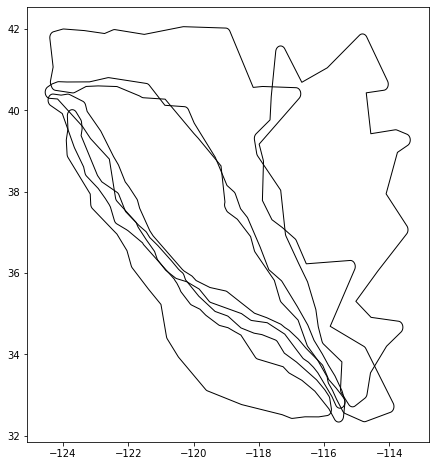

In [20]:
pbase = al_buffer_list[0].plot(facecolor="none",edgecolor="black")
for entry in al_buffer_list[1:]:
    entry.plot(ax=pbase,facecolor="none",edgecolor="black")

In [21]:

num_class = len(class_list)
c_line = []
for i in range(num_class):
    for j in range(i+1,num_class):
        c1 = al_buffer_list[i].intersection(al_buffer_list[j])
        if c1.area[0] > 0.5:
            print(c1.geom_type[0])
            attributes = {"id": 1, "name": "polygon", "valid": True}
            if c1.geom_type[0] == 'Polygon':
                centerline = Centerline(shapely.geometry.Polygon(c1.geometry[0]),interpolation_distance=0.1, **attributes)
                c_line.append(centerline)
            else:
                for c2 in c1:
                    centerline = Centerline(c2,interpolation_distance=0.1, **attributes)
                    c_line.append(centerline)

Polygon
MultiPolygon
MultiPolygon
Polygon


<ipython-input-21-94e73c01de12>:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if c1.area[0] > 0.5:


<AxesSubplot:>

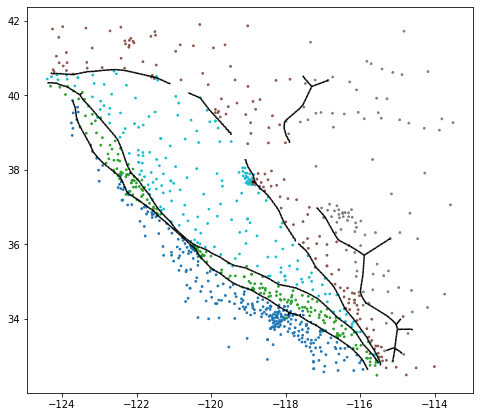

In [22]:
s=geopandas.GeoSeries(c_line)
base = gpd.plot(column="Label", markersize = 3)
s.plot(ax=base,edgecolor = "black")

### Ten classes example

<AxesSubplot:>

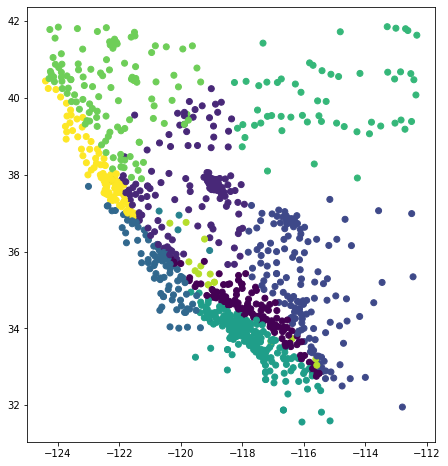

In [23]:
gpd = geopandas.read_file("v10class2d.geojson")
gpd.plot(column="Label")

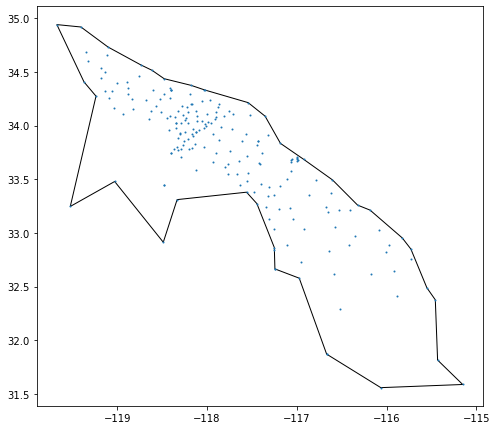

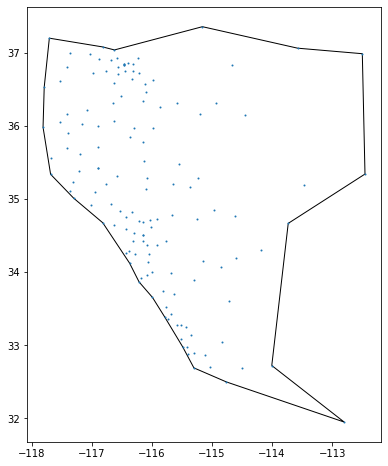

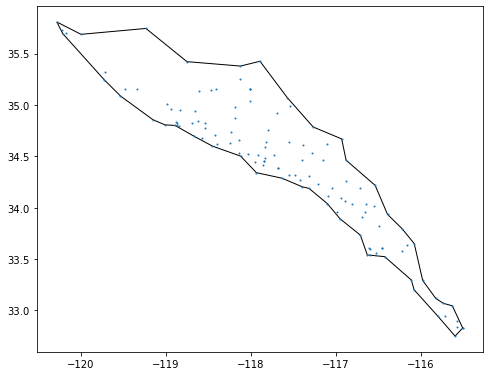

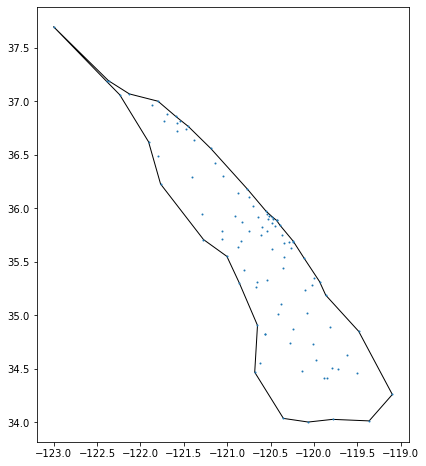

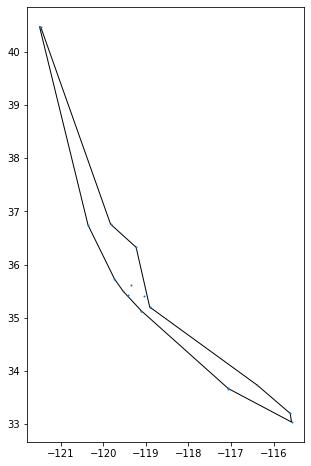

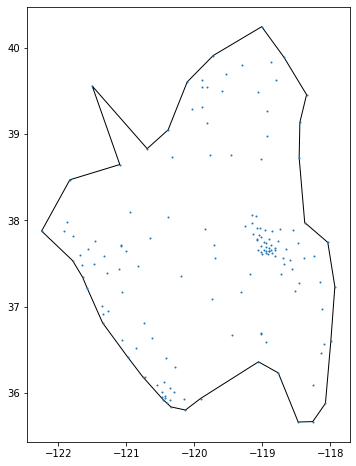

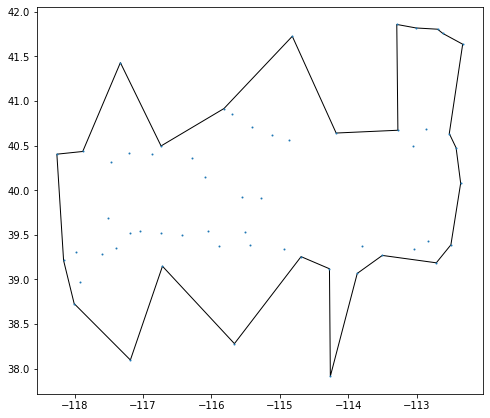

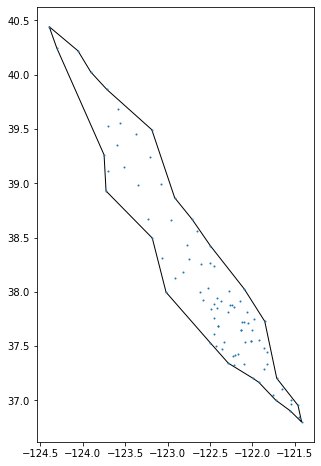

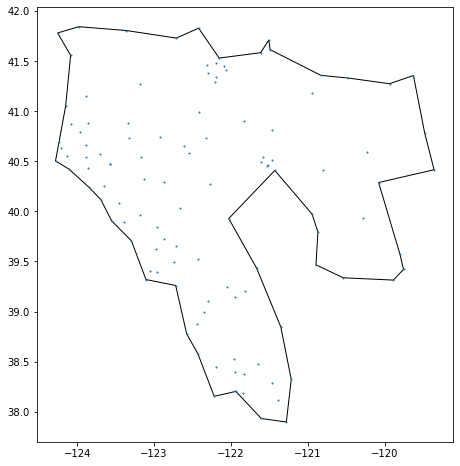

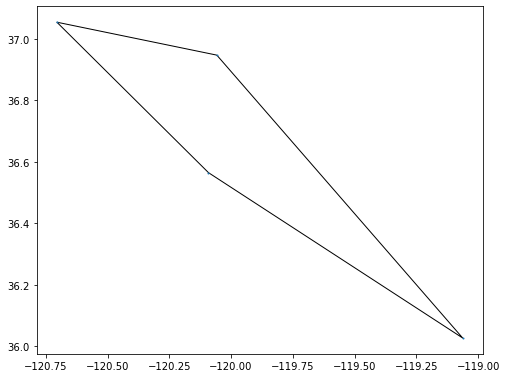

In [24]:
class_list = gpd.Label.unique()
al_list = []
for entry in class_list:
    # select gpd by name
    temgpd = gpd[(gpd['Label'] == entry)]
    ashape = alphashape.alphashape(temgpd)
    al_list.append(ashape)
    base = ashape.plot(facecolor="none",edgecolor="black")
    temgpd.plot(ax=base, markersize=1)

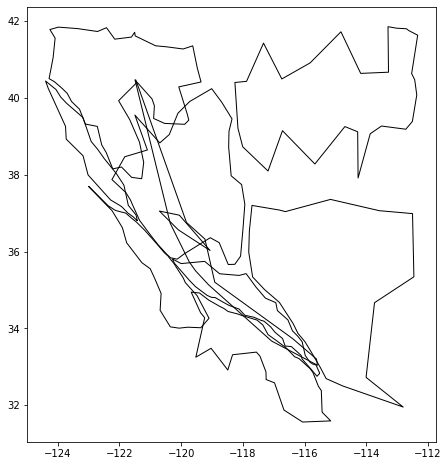

In [25]:
pbase = al_list[0].plot(facecolor="none",edgecolor="black")
for entry in al_list[1:]:
    entry.plot(ax=pbase,facecolor="none",edgecolor="black")

<ipython-input-49-848162ef3784>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  al_buffer_list = [x['geometry'].buffer(0.25) for x in al_list]


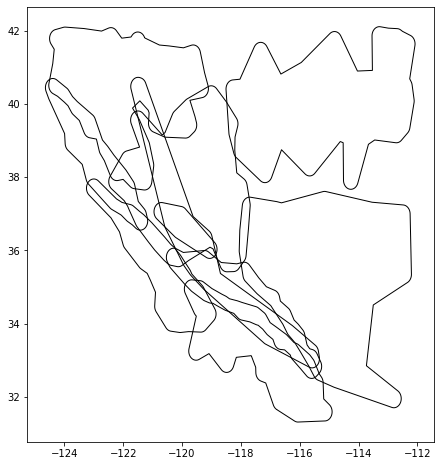

In [49]:
al_buffer_list = [x['geometry'].buffer(0.25) for x in al_list]
pbase = al_buffer_list[0].plot(facecolor="none",edgecolor="black")
for entry in al_buffer_list[1:]:
    entry.plot(ax=pbase,facecolor="none",edgecolor="black")

In [50]:
num_class = len(class_list)
c_line = []
for i in range(num_class):
    for j in range(i+1,num_class):
        c1 = al_buffer_list[i].intersection(al_buffer_list[j])
        if c1.area[0] > 0.3:
            print(c1.geom_type[0])
            attributes = {"id": 1, "name": "polygon", "valid": True}
            if c1.geom_type[0] == 'Polygon':
                centerline = Centerline(shapely.geometry.Polygon(c1.geometry[0]),interpolation_distance=0.1, **attributes)
                c_line.append(centerline)
            else:
                for c2 in c1:
                    centerline = Centerline(c2,interpolation_distance=0.1, **attributes)
                    c_line.append(centerline)

<ipython-input-50-a0ec4c01c26c>:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if c1.area[0] > 0.3:


Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon


<AxesSubplot:>

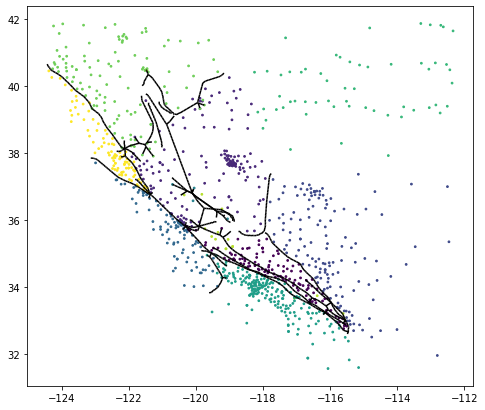

In [51]:
s=geopandas.GeoSeries(c_line)
base = gpd.plot(column="Label", markersize = 3)
s.plot(ax=base,edgecolor = "black")